In [1]:
import math
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ROOT

ROOT.ROOT.EnableThreadSafety()

Welcome to JupyROOT 6.16/00


In [2]:
def simulation(distance, doubleplane, energy, physics, n_events, air, overwrite):
    outfile = f"output/{distance}m_{doubleplane}dp_{energy}AMeV_1n_{physics}.simu-traj-{'air' if air else 'vacuum'}.root"
    parfile = f"output/{distance}m_{doubleplane}dp_{energy}AMeV_1n_{physics}.para-traj-{'air' if air else 'vacuum'}.root"

    if os.path.isfile(outfile) or os.path.isfile(parfile):
        if overwrite:
            for f in [outfile, parfile]:
                if os.path.exists(f):
                    os.remove(f)
        else:
            print(f"Output {outfile} exists and overwriting is disabled")
            return

    ROOT.ROOT.EnableThreadSafety()
    ROOT.FairLogger.GetLogger().SetLogVerbosityLevel("LOW")
    ROOT.FairLogger.GetLogger().SetLogScreenLevel("ERROR")

    vmcworkdir = os.environ["VMCWORKDIR"]
    os.environ["GEOMPATH"] = vmcworkdir + "/geometry"
    os.environ["CONFIG_DIR"] = vmcworkdir + "/gconfig"
    os.environ["PHYSICSLIST"] = f"QGSP_{physics.upper()}_HP"

    # Initialize Simulation
    run = ROOT.FairRunSim()
    run.SetName("TGeant4")
    run.SetStoreTraj(True)
    run.SetMaterials("media_r3b.geo")

    # Output
    run.SetSink(ROOT.FairRootFileSink(outfile))

    # Primary Generator
    generator = ROOT.FairPrimaryGenerator()
    box_gen = ROOT.FairBoxGenerator(2112)
    box_gen.SetThetaRange(0.0, 1.0)
    box_gen.SetPhiRange(0.0, 360.0)
    box_gen.SetEkinRange(energy / 1000.0, energy / 1000.0)
    box_gen.SetXYZ(0.0, 0.0, 0.0)
    generator.AddGenerator(box_gen)
    run.SetGenerator(generator)

    # Geometry
    cave = ROOT.R3BCave("Cave")
    if air:
        cave.SetGeometryFileName("r3b_cave.geo")
    else:
        cave.SetGeometryFileName("r3b_cave_vacuum.geo")
    run.AddModule(cave)

    neuland_position = ROOT.TGeoTranslation(0.0, 0.0, distance * 100 + doubleplane * 10.0 / 2.0)
    neuland = ROOT.R3BNeuland(doubleplane, neuland_position)
    run.AddModule(neuland)

    # Prepare to run
    run.Init()
    ROOT.TVirtualMC.GetMC().SetRandom(ROOT.TRandom3(1337))
    ROOT.TVirtualMC.GetMC().SetMaxNStep(100000)

    # Runtime Database
    rtdb = run.GetRuntimeDb()
    parout = ROOT.FairParRootFileIo(True)
    parout.open(parfile)
    rtdb.setOutput(parout)
    rtdb.saveOutput()

    # Run
    run.Run(n_events)

In [3]:
distance = 15
doubleplane = 30
energy = 600
physics = "inclxx"
n_events = 1000
air = False

In [ ]:
# Note: Can't handle two simulations back-to-back. Restart Kernel.
simulation(distance, doubleplane, energy, physics, n_events, air, overwrite=True)

In [5]:
def get_point_angle(point):
    try:
        return round(math.degrees(math.atan(math.sqrt(point[0] ** 2 + point[1] ** 2) / point[2])), 3)
    except:
        return 0

In [6]:
def print_point(i_point, point):
    print(
        i_point,
        round(point[0], 2),
        round(point[1], 2),
        round(point[2], 2),
        get_point_angle(point),
    )

In [7]:
simufile = f"output/{distance}m_{doubleplane}dp_{energy}AMeV_1n_{physics}.simu-traj-{'air' if air else 'vacuum'}.root"
tfile = ROOT.TFile.Open(simufile)
ttree = tfile.evt

Angle change: 295 0.615 1.826 -> 1.211
-----
210 -19.3 0.01 1798.84 0.615
211 -19.31 -0.05 1799.9 0.615
212 -19.34 -0.63 1809.95 0.613
213 -19.37 -1.21 1819.94 0.611
214 -19.4 -1.78 1829.92 0.61
215 -19.44 -2.36 1839.9 0.61
222 -19.66 -6.39 1909.79 0.62
232 -19.98 -12.14 2009.62 0.667




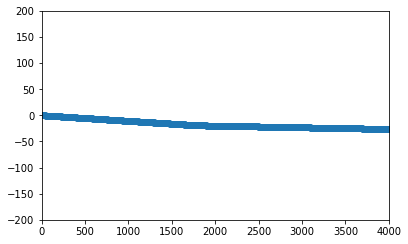

Angle change: 322 0.272 0.724 -> 0.452
-----
169 7.59 -0.02 1595.03 0.272
170 7.59 -0.02 1595.61 0.272
171 7.52 -0.1 1599.9 0.269
172 7.45 -0.19 1604.9 0.266
173 7.37 -0.28 1609.9 0.263
174 7.3 -0.37 1614.9 0.259
181 6.78 -0.99 1649.9 0.238
191 6.03 -1.88 1699.9 0.213




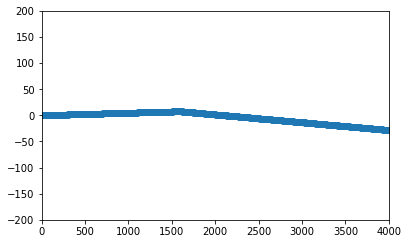

Angle change: 438 0.411 1.728 -> 1.317
-----
204 9.37 8.58 1769.9 0.411
205 9.38 8.59 1771.36 0.411
206 9.19 8.48 1774.9 0.404
207 8.92 8.34 1779.9 0.393
208 8.66 8.19 1784.9 0.383
209 8.39 8.04 1789.9 0.372
216 5.19 6.29 1849.88 0.253
226 -0.14 3.38 1949.69 0.1




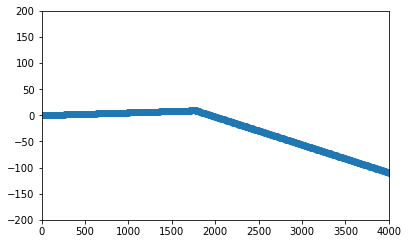

Angle change: 474 0.043 3.075 -> 3.032
-----
208 0.0 -1.35 1790.03 0.043
209 0.0 -1.35 1790.7 0.043
210 -0.02 -1.24 1792.39 0.039
211 0.0 -0.99 1794.9 0.031
212 0.03 -0.74 1797.4 0.024
213 0.06 -0.48 1799.97 0.016
220 0.78 6.41 1869.63 0.198
230 1.82 16.27 1969.13 0.476




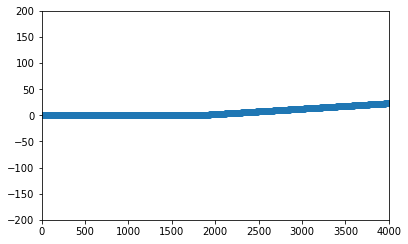

Angle change: 739 0.591 0.619 -> 0.028
-----
179 16.74 2.48 1639.9 0.591
180 16.75 2.48 1640.82 0.591
181 16.67 2.53 1644.9 0.587
182 16.57 2.6 1649.9 0.583
183 16.48 2.67 1654.9 0.578
184 16.38 2.73 1659.9 0.573
191 15.71 3.19 1694.9 0.542
201 14.94 3.72 1734.9 0.508




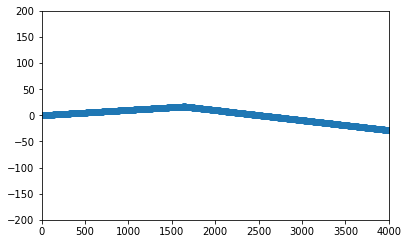

Angle change: 886 0.302 1.296 -> 0.994
-----
190 -7.48 4.91 1699.9 0.302
191 -7.49 4.92 1701.73 0.302
192 -7.47 4.9 1702.25 0.301
193 -7.4 4.81 1704.9 0.297
194 -7.25 4.65 1709.9 0.289
195 -7.11 4.48 1714.9 0.281
202 -6.1 3.33 1749.9 0.227
212 -4.94 2.0 1789.97 0.171




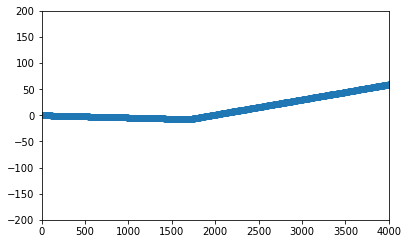

In [8]:
i_event = -1

where_angle_change = []
events_without_secondaries = 0

for event in ttree:
    i_event += 1
    if event.MCTrack.GetEntries() == 1:
        events_without_secondaries += 1
        track = event.GeoTracks[0]
        n_points = track.GetNpoints()

        start_angle = get_point_angle(track.GetPoint(10))
        end_angle = get_point_angle(track.GetPoint(n_points - 10))
        angle_diff = round(abs(start_angle - end_angle), 3)

        if angle_diff > 0:
            print("Angle change:", i_event, start_angle, end_angle, "->", angle_diff)
            print("-----")
            for i_point in range(10, n_points - 10):
                point = track.GetPoint(i_point)
                curr_angle = get_point_angle(point)
                curr_angle_diff = round(abs(start_angle - curr_angle), 3)

                if curr_angle_diff > 0:
                    where_angle_change.append(
                        (
                            i_event,
                            round(point[0], 3),
                            round(point[1], 3),
                            round(point[2], 3),
                            round(point[3], 3),
                        )
                    )
                    for i in [
                        i_point - 2,
                        i_point - 1,
                        i_point,
                        i_point + 1,
                        i_point + 2,
                        i_point + 3,
                        i_point + 10,
                        i_point + 20,
                    ]:
                        print_point(i, track.GetPoint(i))
                    print("")
                    print("")
                    break

            xs = []
            zs = []
            ds = []

            for i_point in range(1, n_points):
                point = track.GetPoint(i_point)
                ds.append(round(abs(start_angle - get_point_angle(point)), 3))
                xs.append(round(point[0], 3))
                zs.append(round(point[2], 3))

            fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
            ax = fig.add_subplot(111)
            ax.scatter(zs, xs)
            ax.set_xlim(0, 4000)
            ax.set_ylim(-200, 200)
            display(fig)
            plt.close()

In [9]:
print("Events without secondaries:   ", round(events_without_secondaries / n_events * 100, 2), "%")
df = pd.DataFrame(where_angle_change, columns=["Track", "X", "Y", "Z", "T"])
print("... of which w/ angle change: ", round(df.shape[0] / n_events * 100, 3), "%")
print("angle changes not in the detector:", df[df["Z"] < distance * 100].shape[0])

display(df)

Events without secondaries:    0.9 %
... of which w/ angle change:  0.6 %
angle changes not in the detector: 0


,Track,X,Y,Z,T
0,295,-19.340,-0.630,1809.953,0.0
1,322,7.524,-0.100,1599.900,0.0
2,438,9.192,8.482,1774.900,0.0
3,474,-0.022,-1.235,1792.386,0.0
4,739,16.670,2.534,1644.900,0.0
5,886,-7.472,4.900,1702.247,0.0


In [10]:
i_event = -1
for event in ttree:
    i_event += 1

    if i_event > 1000:
        break

    reaction_in_air = False
    for i_track, mctrack in enumerate(event.MCTrack):
        if mctrack.GetMotherId() == 0 and mctrack.GetStartZ() < distance * 100:
            reaction_in_air = True
            print(i_event, mctrack.GetStartZ())
            break

    if reaction_in_air:
        xs = []
        zs = []

        for track in event.GeoTracks:
            for i_point in range(0, track.GetNpoints()):
                point = track.GetPoint(i_point)
                xs.append(round(point[0], 3))
                zs.append(round(point[2], 3))

        fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
        ax = fig.add_subplot(111)
        ax.scatter(zs, xs)
        ax.set_xlim(0, distance * 100)
        ax.set_ylim(-200, 200)
        display(fig)
        plt.close()